In [1]:
import torch
from torch import nn,optim,softmax,max
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision import datasets,models
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Get cpu or gpu device for training.
device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda:0 device


In [5]:
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [6]:
training_data = datasets.CIFAR10(root="./data", download=True,
                                      train=True, 
                                      transform=transform_train)

test_data = datasets.CIFAR10(root="./data", download=True,
                                  train=False,
                                  transform=transform_test)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [7]:
batch_size = 32

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_dataloader = DataLoader(test_data, batch_size=batch_size,shuffle = False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
#Function to show images
def show_img(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

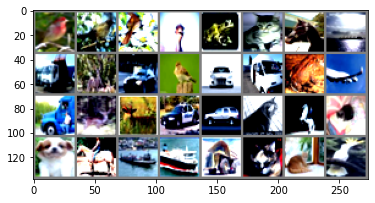

bird 
 bird 
 bird 
 bird 
 frog 
 cat  
 horse
 ship 
 truck
 deer 
 car  
 bird 
 car  
 truck
 frog 
 plane
 truck
 deer 
 deer 
 car  
 car  
 cat  
 horse
 cat  
 dog  
 horse
 ship 
 ship 
 truck
 cat  
 cat  
 bird 



In [9]:
# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)
# show images
show_img(make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}'+'\n' for j in range(batch_size)))

In [ ]:
class Neural_net(nn.Module):
  def __init__(self):
    super(Neural_net,self).__init__()

    # creating the 2D convolution layers
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
    self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)

    #creating drop-out layers
    self.dc1= nn.Dropout(0.25)
    self.dc2= nn.Dropout(0.5)

    #Creating Max-Pooling 
    self.mp1= nn.MaxPool2d(2,stride=2)

    #Fully Connected layer mapping the output of the convolutional layers to 128
    self.fc1= nn.Linear(32* 16* 16,256)
    
    self.fc2 = nn.Linear(256, 128)
    #Fully connected layers for 10 classes
    self.fc3 = nn.Linear(128, 10)

  def forward(self,X):
    relu = torch.nn.ReLU()

    #applying convlution and ReLU
    X = relu(self.conv1(X))
    X = relu(self.conv2(X))
        
    #print('before max pooling:',X.shape)
    #applying Max pooling
    
    X=self.mp1(X)
    
    #applying drop out
    X=self.dc1(X)

    #print('Afer max pooling:', X.shape)

    #Flattening the inputs
    X = X.reshape(-1,32* 16* 16)    
    X = relu(self.fc1(X))

    #applying drop out
    #X = self.dc2(X)

    X = relu(self.fc2(X))
  
    output = self.fc3(X)
    
    return output

In [ ]:
model= Neural_net()
model.to(device)
print(model)

Neural_net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dc1): Dropout(p=0.25, inplace=False)
  (dc2): Dropout(p=0.5, inplace=False)
  (mp1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8192, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [11]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

NameError: ignored

In [10]:
def train_for_epoch(dataloader):

    # putting model in train mode
    model.train()

    # keep track of the training losses during the epoch
    train_losses = []

    for batch, targets in dataloader:
        batch = batch.to(device)
        targets = targets.to(device)

        # clear previous gradient computation
        optimizer.zero_grad()

        # forward propagation
        predictions = model(batch)
        
        # calculate the loss
        loss = loss_func(predictions, targets)

        # backpropagate to compute gradients
        loss.backward()

        # update model weights
        optimizer.step()

        # update average loss
        train_losses.append(loss.item())

    # calculate average training loss
    train_loss = np.mean(train_losses)

    return train_loss

In [12]:
def train(first_epoch, num_epochs,train_dataloader):
    
    train_losses = []

    for epoch in range(first_epoch, first_epoch + num_epochs):

        # training phase
        train_loss = train_for_epoch(train_dataloader)      

        print(f'epoch: [{epoch:02d}] train loss: {train_loss:04f}')
        
        train_losses.append(train_loss)
    
    return train_losses

In [13]:
def plot_loss(train_loss):
  epochs = range(1, len(train_loss) + 1)
  plt.figure(figsize=(10,6))
  plt.plot(epochs, train_loss, '-o', label='Training loss')
  plt.legend()
  plt.title('Learning curve')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.xticks(epochs)
  plt.show()

In [ ]:
# Train the Neural Network
train_loss=train(1,20,train_dataloader)

In [ ]:
#Plot the loss of the Neural Network
plot_loss(train_loss)

In [14]:
def check_accuracy(dataloader):
  # putting model in evaluation mode
    model.eval()
    
    y_pred=[]

    with torch.no_grad():

      #go over each batch to determine model accuracy.

      for batch,_ in dataloader:
        batch = batch.to(device)
        # Predict probabilty of each class
        predictions = model(batch)

        #applying softmax on predictions
        predictions = softmax(predictions,dim=1)

        # convert to numpy
        predictions = predictions.cpu().numpy()

        # save
        y_pred.append(predictions)
    
    # stack predictions into a (num_samples, 10) array
    y_pred = np.vstack(y_pred)
    return y_pred
  

In [ ]:
# compute predictions on the test set
y_pred = check_accuracy(test_dataloader)
# find the argmax of each of the predictions
y_pred = y_pred.argmax(axis=1)
# get the true labels and convert to numpy
y_true = np.array(test_data.targets)
# Calculate accuracy as the average number of times y_true == y_pred
accuracy = np.mean(np.equal(y_pred,y_true))
print(accuracy)

0.0978


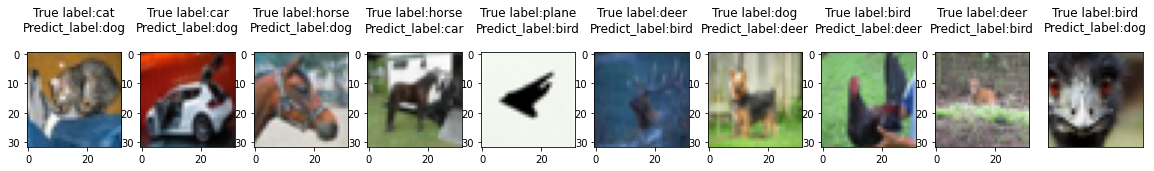

In [ ]:
error_indicator = y_pred != y_true
error_examples = test_data.data[error_indicator, :, :]
sample = error_examples[:10]
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20,20))
plt.grid(False)
plt.xticks([])
plt.yticks([])
for i in range(sample.shape[0]):
  axes[i].set_title('True label:'+classes[y_true[error_indicator][i]]+'\n''Predict_label:'+ classes[y_pred[error_indicator][i]]+'\n')
  axes[i].imshow(sample[i,:,:,:])
  
plt.show()

#Using the Best Model from Lab *3.3* on CIFAR-10 *Dataset*

In [ ]:
# Defining the best model in the lab 3.3
class Neural_net2(nn.Module):
  def __init__(self):
    super(Neural_net2,self).__init__()

    #Fully Connected layer
    self.fc1= nn.Linear(32* 32* 3,128)
    
    #Fully connected layers for 10 classes
    self.fc2 = nn.Linear(128, 10)

  def forward(self,X):
    relu = torch.nn.ReLU()

    #Flattening the inputs
    X = X.reshape(-1,32* 32* 3)    
    X = relu(self.fc1(X))

    output = self.fc2(X)
    
    return output

In [ ]:
#for comparison with the best neural network from lab 3.3 uncomment the below code and comment the above model defn.
model= Neural_net2()
model.to(device)
print(model)

Neural_net2(
  (fc1): Linear(in_features=3072, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [ ]:
def train_for_epoch():

    # putting model in train mode
    model.train()

    # keep track of the training losses during the epoch
    train_losses = []

    for batch, targets in train_dataloader:
        batch = batch.to(device)
        targets = targets.to(device)

        # clear previous gradient computation
        optimizer.zero_grad()

        # forward propagation
        predictions = model(batch)
        
        # calculate the loss
        loss = loss_func(predictions, targets)

        # backpropagate to compute gradients
        loss.backward()

        # update model weights
        optimizer.step()

        # update average loss
        train_losses.append(loss.item())

    # calculate average training loss
    train_loss = np.mean(train_losses)

    return train_loss

In [ ]:
def train(first_epoch, num_epochs):
    
    train_losses = []

    for epoch in range(first_epoch, first_epoch + num_epochs):

        # training phase
        train_loss = train_for_epoch()      

        print(f'epoch: [{epoch:02d}] train loss: {train_loss:04f}')
        
        train_losses.append(train_loss)
    
    return train_losses

In [ ]:
train_loss=train(1,20)

epoch: [01] train loss: 1.689970
epoch: [02] train loss: 1.491576
epoch: [03] train loss: 1.406052
epoch: [04] train loss: 1.346140
epoch: [05] train loss: 1.294000
epoch: [06] train loss: 1.253844
epoch: [07] train loss: 1.217511
epoch: [08] train loss: 1.182760
epoch: [09] train loss: 1.154703
epoch: [10] train loss: 1.126109
epoch: [11] train loss: 1.100978
epoch: [12] train loss: 1.072489
epoch: [13] train loss: 1.052352
epoch: [14] train loss: 1.029639
epoch: [15] train loss: 1.005870
epoch: [16] train loss: 0.986208
epoch: [17] train loss: 0.966652
epoch: [18] train loss: 0.948369
epoch: [19] train loss: 0.931627
epoch: [20] train loss: 0.911189


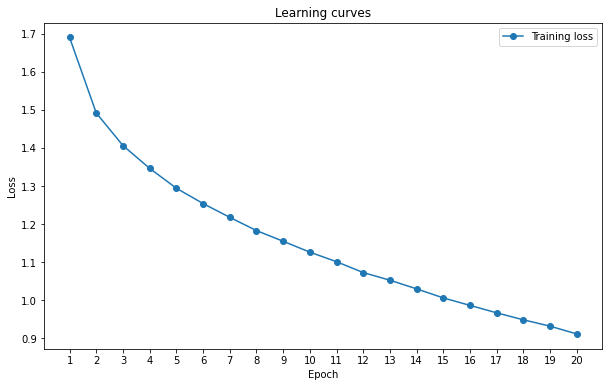

In [ ]:
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, train_loss, '-o', label='Training loss')
plt.legend()
plt.title('Learning curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.show()

In [ ]:
def check_accuracy(dataloader):
  # putting model in evaluation mode
    model.eval()
    
    y_pred=[]

    with torch.no_grad():

      #go over each batch to determine model accuracy.

      for batch,_ in dataloader:
        batch = batch.to(device)
        # Predict probabilty of each class
        predictions = model(batch)

        #applying softmax on predictions
        predictions = softmax(predictions,dim=1)

        # convert to numpy
        predictions = predictions.cpu().numpy()

        # save
        y_pred.append(predictions)
    
    # stack predictions into a (num_samples, 10) array
    y_pred = np.vstack(y_pred)
    return y_pred
  

In [ ]:
# compute predictions on the test set
y_pred = check_accuracy(test_dataloader)

In [ ]:
# find the argmax of each of the predictions
y_pred = y_pred.argmax(axis=1)

In [ ]:
# get the true labels and convert to numpy
y_true = np.array(test_data.targets)


In [ ]:
# Calculate accuracy as the average number of times y_true == y_pred
accuracy = np.mean(np.equal(y_pred,y_true))
print(accuracy)

0.5079


# 3 Data Augumentation

In [ ]:
# Data Augumention
aug_transform_train = transforms.Compose([
    transforms.RandomAdjustSharpness(5), # Randomly adjusting the sharpness
    transforms.ColorJitter(brightness=1.5, contrast=0.75, saturation=1.25), # Randomly changing the HSV
    transforms.RandomHorizontalFlip(0.5), #Horizontal flipling the data
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
training_data2 = datasets.CIFAR10(root="./data", download=True,
                                      train=True, 
                                      transform=aug_transform_train)

Files already downloaded and verified


In [ ]:
train_dataloader2 = DataLoader(training_data2, batch_size=batch_size, shuffle=True, num_workers=2)

In [ ]:
train_loss=train(1,40,train_dataloader2)

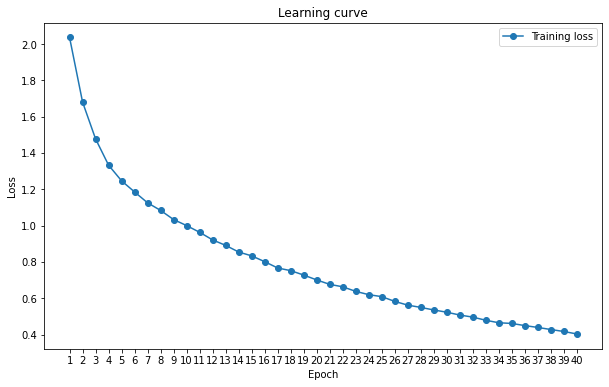

In [ ]:
plot_loss(train_loss)

In [ ]:
# compute predictions on the test set
y_pred2 = check_accuracy(test_dataloader)
# find the argmax of each of the predictions
y_pred2 = y_pred2.argmax(axis=1)
# get the true labels and convert to numpy
y_true = np.array(test_data.targets)
# Calculate accuracy as the average number of times y_true == y_pred
accuracy = np.mean(np.equal(y_pred2,y_true))
print(accuracy)

0.7278


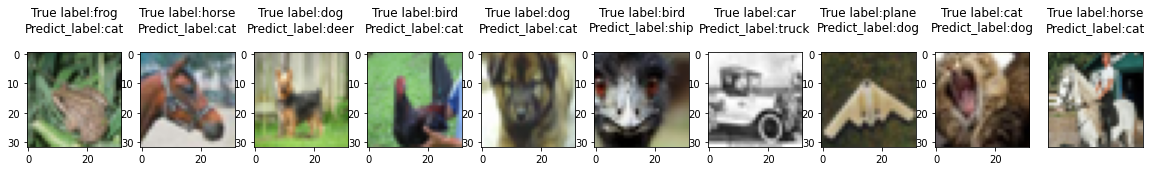

In [ ]:
error_indicator = y_pred2 != y_true
error_examples = test_data.data[error_indicator, :, :]
sample = error_examples[:10]
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(20,20))
plt.grid(False)
plt.xticks([])
plt.yticks([])
for i in range(sample.shape[0]):
  axes[i].set_title('True label:'+classes[y_true[error_indicator][i]]+'\n''Predict_label:'+ classes[y_pred2[error_indicator][i]]+'\n')
  axes[i].imshow(sample[i,:,:,:])
  
plt.show()

# Transfer learning / fine-tuning on CIFAR10 dataset

In [15]:
# Data Augumention
aug_transform_train_tl = transforms.Compose([
    transforms.RandomAdjustSharpness(5), # Randomly adjusting the sharpness
    transforms.ColorJitter(brightness=1.5, contrast=0.75, saturation=1.25), # Randomly changing the HSV
    transforms.RandomHorizontalFlip(0.5), #Horizontal flipling the data
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
aug_transform_test_tl = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [16]:
training_data3 = datasets.CIFAR10(root="./data", download=True,
                                      train=True, 
                                      transform=aug_transform_train_tl)

Files already downloaded and verified


In [17]:
test_data3 = datasets.CIFAR10(root="./data", download=True,
                                      train=False, 
                                      transform=aug_transform_test_tl)

Files already downloaded and verified


In [18]:
train_dataloader3 = DataLoader(training_data3, batch_size=batch_size, shuffle=True, num_workers=2)
test_dataloader3 = DataLoader(test_data3, batch_size=batch_size, num_workers=2)

In [19]:
# Using the resnet 50 pretrained on imagenet
model = models.resnet50(pretrained='imagenet')
input_features = model.fc.in_features
model.fc = nn.Linear(input_features,10)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [20]:
model.to(device)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [22]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=0.01)
train_loss=train(1,10,train_dataloader3)

epoch: [01] train loss: 1.228595
epoch: [02] train loss: 0.829700
epoch: [03] train loss: 0.712367
epoch: [04] train loss: 0.633835
epoch: [05] train loss: 0.585715
epoch: [06] train loss: 0.545932
epoch: [07] train loss: 0.504709
epoch: [08] train loss: 0.476839
epoch: [09] train loss: 0.447465
epoch: [10] train loss: 0.429560


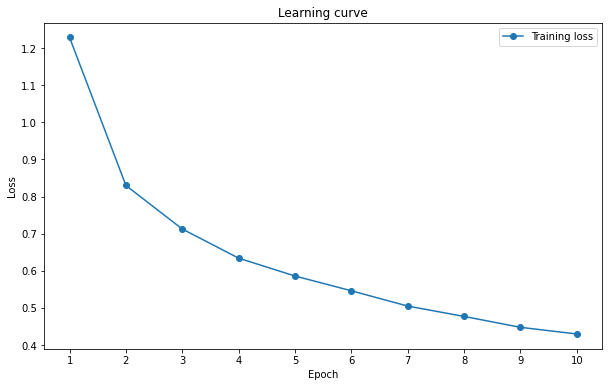

In [23]:
plot_loss(train_loss)

In [24]:
# compute predictions on the test set
y_pred3 = check_accuracy(test_dataloader)
# find the argmax of each of the predictions
y_pred3 = y_pred3.argmax(axis=1)
# get the true labels and convert to numpy
y_true = np.array(test_data.targets)
# Calculate accuracy as the average number of times y_true == y_pred
accuracy = np.mean(np.equal(y_pred3,y_true))
print(accuracy)

0.8591
